<a href="https://colab.research.google.com/github/BallDonlawat/b5925506c/blob/master/EX2_CNN_with_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import zipfile, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import keras
from os import listdir
from os.path import isfile, join
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [0]:
zip_ref = zipfile.ZipFile('Animal.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1000,activation='relu')(x) 
x=Dense(1000,activation='relu')(x) 
x=Dense(1000,activation='relu')(x) 
x=Dense(1000,activation='relu')(x) 
x=Dense(1000,activation='relu')(x) 
x=Dense(1000,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
train_generator=train_datagen.flow_from_directory('Animal/',target_size=(224,224),color_mode='rgb',
                                                 batch_size=32,class_mode='categorical',shuffle=True)

Found 141 images belonging to 2 classes.


In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(generator=train_generator,steps_per_epoch=1000,epochs=40)

Epoch 1/40
1000/1000 [==============================] - 195s 195ms/step - loss: 0.0688 - acc: 0.9856
Epoch 2/40
1000/1000 [==============================] - 190s 190ms/step - loss: 0.1626 - acc: 0.9584
Epoch 3/40
1000/1000 [==============================] - 190s 190ms/step - loss: 0.1580 - acc: 0.9702
Epoch 4/40
1000/1000 [==============================] - 192s 192ms/step - loss: 0.1719 - acc: 0.9708
Epoch 5/40
1000/1000 [==============================] - 192s 192ms/step - loss: 0.1429 - acc: 0.9576
Epoch 6/40
1000/1000 [==============================] - 191s 191ms/step - loss: 0.0042 - acc: 0.9985
Epoch 7/40
1000/1000 [==============================] - 193s 193ms/step - loss: 0.1874 - acc: 0.9315
Epoch 8/40
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0130 - acc: 0.9965
Epoch 9/40
1000/1000 [==============================] - 191s 191ms/step - loss: 0.0031 - acc: 0.9992
Epoch 10/40
1000/1000 [==============================] - 192s 192ms/step - loss: 3.3328e-04

In [0]:
def ToClass(image):
  if image.shape[-1] > 1:
    return image.argmax(axis=-1)
  else:
    return (image > 0.5).astype('int32')
def ResultClass(R):
  if(ToClass(R)==0):
    return 'Cat'
  else:
    return 'Dog'

In [0]:
mypath = "Animal/cats/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)
# predicting images
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = ToClass(classes)
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

['images (60).jpg', 'images (14).jpg', 'images (80).jpg', 'images (12).jpg', 'images (68).jpg', 'images (22).jpg', '2Q== (4).jpg', 'images (33).jpg', 'images (8).jpg', 'images (96).jpg', 'images (39).jpg', 'images (49).jpg', 'images (24).jpg', 'images (25).jpg', 'images (89).jpg', 'images (38).jpg', 'images (57).jpg', 'images (9).jpg', 'images (27).jpg', 'images (64).jpg', '2Q== (1).jpg', '9k=.jpg', 'images (91).jpg', 'images (78).jpg', 'images (63).jpg', 'images (76).jpg', 'images (66).jpg', 'Z (2).jpg', '2Q==.jpg', 'images (98).jpg', 'images (44).jpg', 'images (94).jpg', 'images (42).jpg', '9k= (2).jpg', 'images (72).jpg', 'images (40).jpg', 'images (93).jpg', 'images (20).jpg', 'images (26).jpg', 'images (83).jpg', 'images (34).jpg', 'images (67).jpg', 'images (59).jpg', 'images (85).jpg', 'images (82).jpg', 'images (5).jpg', 'images (53).jpg', 'images (52).jpg', 'images (69).jpg', 'images (99).jpg', 'images (70).jpg', 'images (61).jpg', 'images (79).jpg', 'images (77).jpg', 'images

In [0]:
mypath = "Animal/dogs/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)
# predicting images
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = ToClass(classes)
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

['images (14).jpg', 'images (12).jpg', 'images (22).jpg', 'images (8).jpg', 'images (24).jpg', 'images (25).jpg', 'images (9).jpg', 'images (27).jpg', '2Q== (1).jpg', '9k=.jpg', '2Q==.jpg', '9k= (2).jpg', 'images (20).jpg', 'images (26).jpg', 'images (5).jpg', 'images (4).jpg', 'images (6).jpg', '2Q== (2).jpg', 'images (18).jpg', '9k= (1).jpg', 'images (11).jpg', 'images (19).jpg', 'images (1).jpg', 'images (13).jpg', 'images (21).jpg', 'images (3).jpg', 'images (2).jpg', 'Z.jpg', 'images (15).jpg', 'images (17).jpg', 'images.jpg', 'images (10).jpg', 'images (7).jpg', 'images (23).jpg', 'images (16).jpg']
images (14).jpg: cat
images (12).jpg: cat
images (22).jpg: cat
images (8).jpg: cat
images (24).jpg: cat
images (25).jpg: cat
images (9).jpg: dog
images (27).jpg: cat
2Q== (1).jpg: cat
9k=.jpg: cat
2Q==.jpg: dog
9k= (2).jpg: cat
images (20).jpg: dog
images (26).jpg: cat
images (5).jpg: cat
images (4).jpg: cat
images (6).jpg: cat
2Q== (2).jpg: cat
images (18).jpg: cat
9k= (1).jpg: cat
i

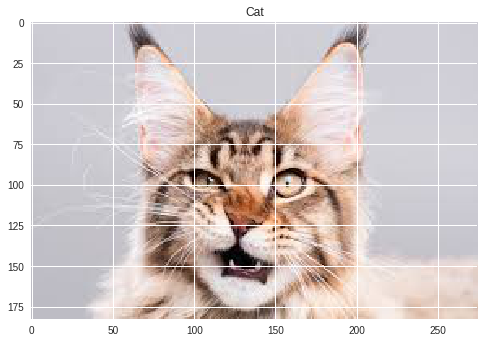

In [0]:
Catpath = 'Animal/cats/2Q== (2).jpg'
test_imageCat = image.load_img(Catpath, target_size=(224,224))
test_imageCat = image.img_to_array(test_imageCat)
test_imageCat = np.expand_dims(test_imageCat, axis = 0)
resultCat = model.predict(test_imageCat)
imgCat=mpimg.imread(Catpath)
imgplotCat = plt.imshow(imgCat)
plt.title(ResultClass(resultCat))
plt.show()

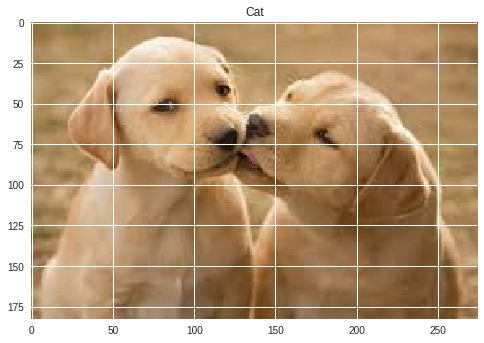

In [0]:
Dogpath = 'Animal/dogs/images (4).jpg'
test_imageDog = image.load_img(Dogpath, target_size=(224,224))
test_imageDog = image.img_to_array(test_imageDog)
test_imageDog = np.expand_dims(test_imageDog, axis = 0)
resultDog = model.predict(test_imageDog)
imgDog=mpimg.imread(Dogpath)
imgplotDog = plt.imshow(imgDog)
plt.title(ResultClass(resultDog))
plt.show()